In [50]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

Load publications data. We are looking at Code and Handbook Sales only, from 2010 onwards

In [51]:
df = pd.read_csv('publications_excl_big_buyer.csv')

In [52]:
df = df.rename(columns = {"DOC_DATE":"date", "REGION_DESC":"region", "SUBJECT_1_CD":"code_type", "SUBJECT_2_CD":"code_number"})
df["date"] = pd.to_datetime(df["date"])
df.head()
df.date[:1]

0   2010-01-04
Name: date, dtype: datetime64[ns]

In [53]:
df=df[df['date']>'2012-01-01']

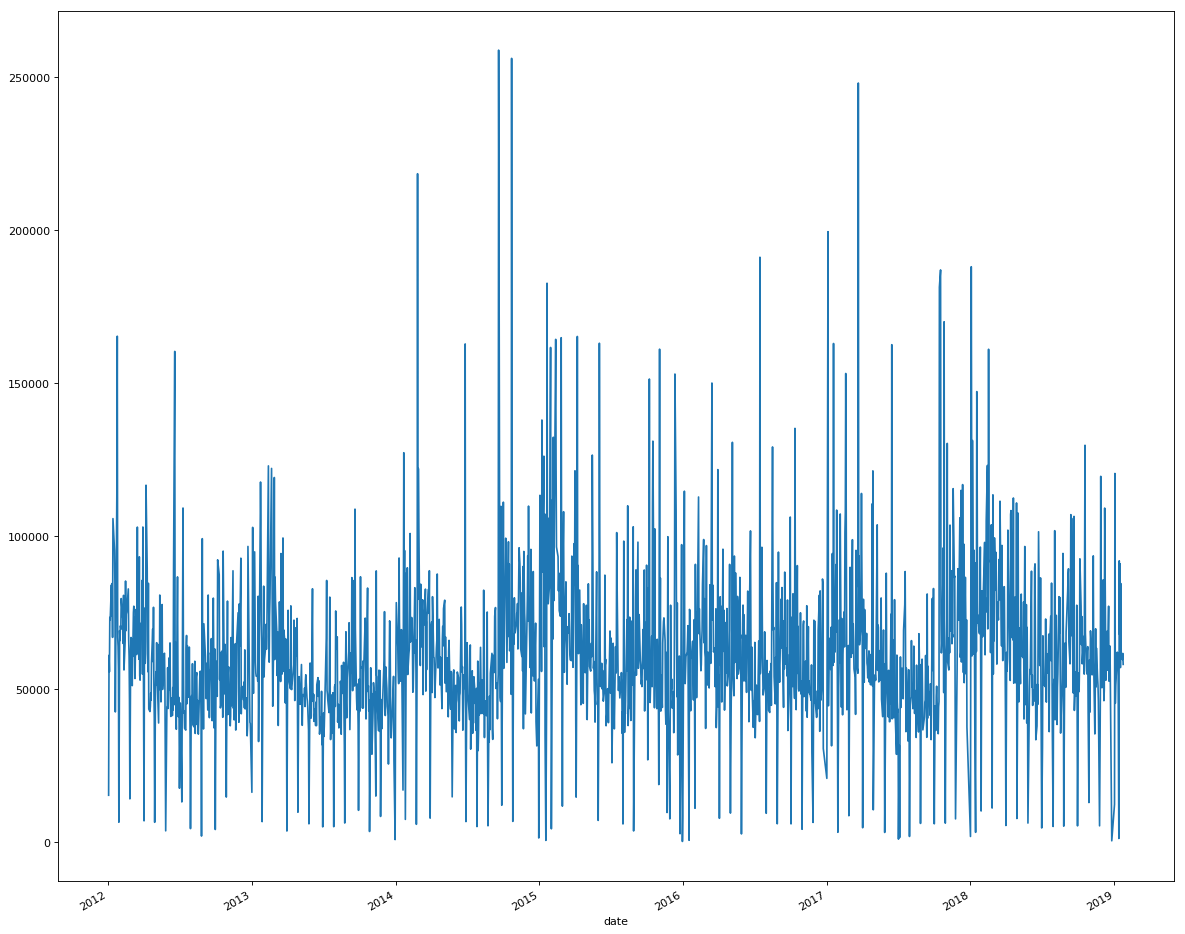

In [54]:
fig=plt.figure(figsize=(18, 16), dpi= 80, facecolor='w', edgecolor='k')
df.groupby('date').sum()['revenue'].plot()

Excluding the year 2010 from out data as there is a large outlier here, possibly caused by the big buyer program

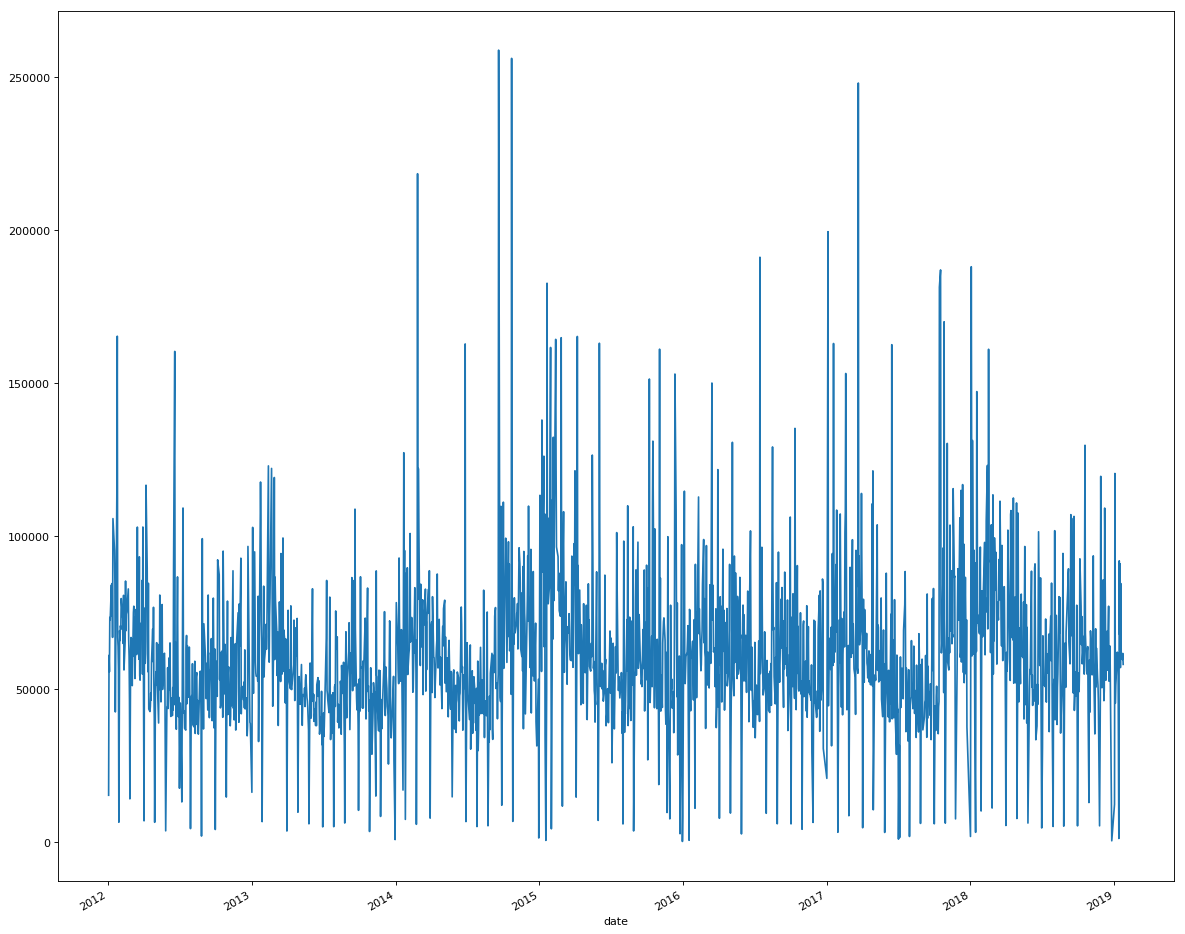

In [55]:
fig=plt.figure(figsize=(18, 16), dpi= 80, facecolor='w', edgecolor='k')
df.groupby('date').sum()['revenue'].plot()

There is a steady trend throughout the years, accompanied by frequent sharp spikes. Years 2011-2014 are less noisy than 2014-2019.  
We can investigate the large spikes more closey, to determine whether these are sporadic, or regular

The large spikes in revenue are due to large volume purchases. These were driven by the big buyer programme and a select group of customers. This program has now ended so we will exclude these types of buyers from our results. This will ensure the data is less skewd. We have begun our analysis again excluding big buyers. There is no discernable pattern as to when these purchases occur.  
Next, we will smooth the data to see a more well behaved trend

In [56]:
df_monthly = df.groupby([pd.Grouper(key = 'date', freq='M'), 'code_type' ]).agg(sum).reset_index()

In [57]:
df

,date,region,revenue,units,SUBJECT_1_DESC,code_type,code_number
109702,2012-01-03,North America,30.15,1,Codes/Stds,Code,1033
109703,2012-01-03,North America,37.35,1,Codes/Stds,Code,12
109704,2012-01-03,North America,33.75,1,Codes/Stds,Code,17
109705,2012-01-03,North America,2233.00,51,Codes/Stds,Code,25
109706,2012-01-03,North America,33.75,1,Codes/Stds,Code,704
109707,2012-01-03,North America,1327.00,30,Codes/Stds,Code,70E
109708,2012-01-03,North America,431.30,4,Handbooks,Handbook,70E
109709,2012-01-03,North America,370.05,6,Codes/Stds,Code,72
109710,2012-01-03,North America,545.40,12,Codes/Stds,Code,99C
109711,2012-01-03,North America,76.05,2,Codes/Stds,Code,10


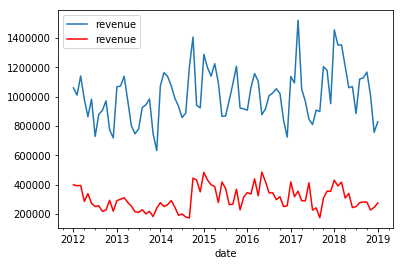

In [58]:
ax = plt.gca()
plt.rcParams['figure.figsize'] = (16,8)
df_monthly[df_monthly.code_type=='Code'].plot(kind='line',x='date',y='revenue',ax=ax, fig=fig)
df_monthly[df_monthly.code_type=='Handbook'].plot(kind='line',x='date',y='revenue', color='red', ax=ax, fig=fig)


In [59]:
df_monthly_code = df_monthly[df_monthly.code_type == 'Code'][['date','revenue']].set_index('date')

In [60]:
df_monthly_code[df_monthly_code.revenue>5000000]

,revenue
date,


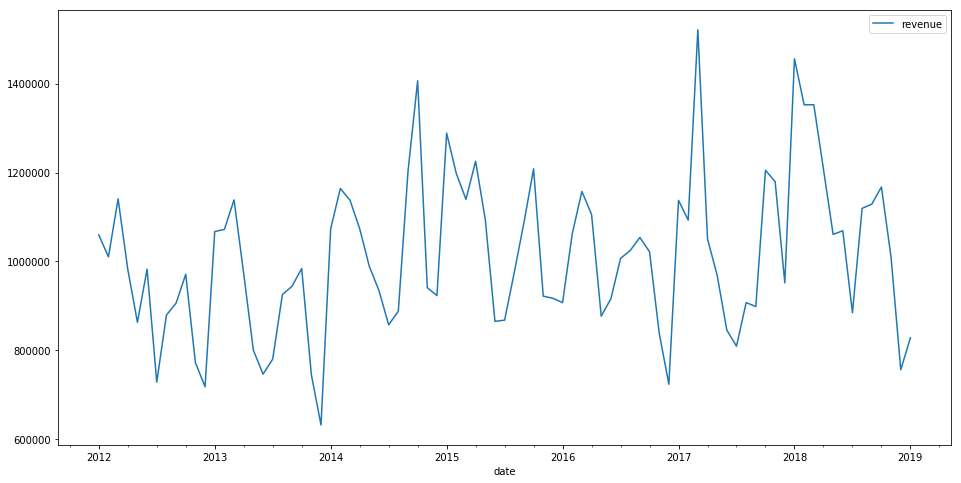

In [61]:
df_monthly_code.plot()

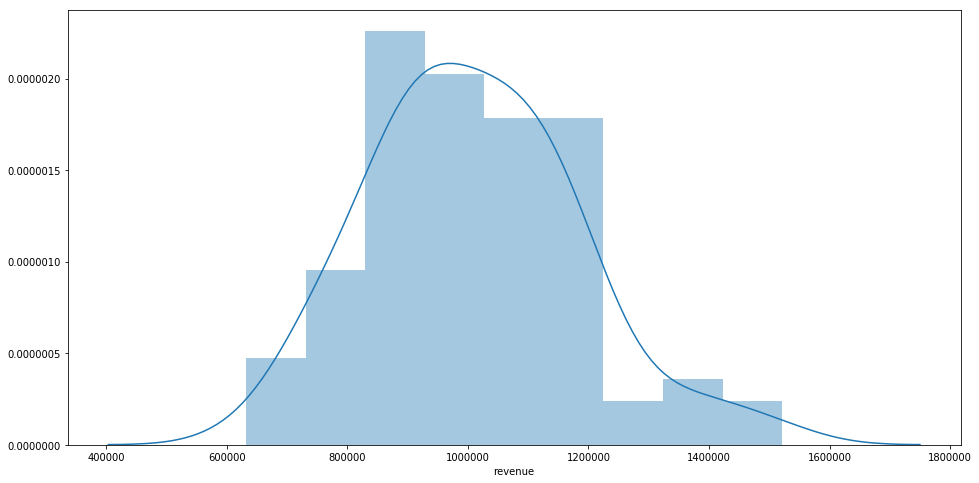

In [62]:
sns.distplot(df_monthly_code.revenue)

normally distributed

In [63]:
from statsmodels.tsa.stattools import adfuller
def test_stationarity(timeseries):
    
    #Determing rolling statistics
    rolmean = timeseries.rolling(12).mean()
    rolstd =  timeseries.rolling(12).std()

    #Plot rolling statistics:
    orig = plt.plot(timeseries, color='blue',label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)
    
    #Perform Dickey-Fuller test:
    print('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print(dfoutput)

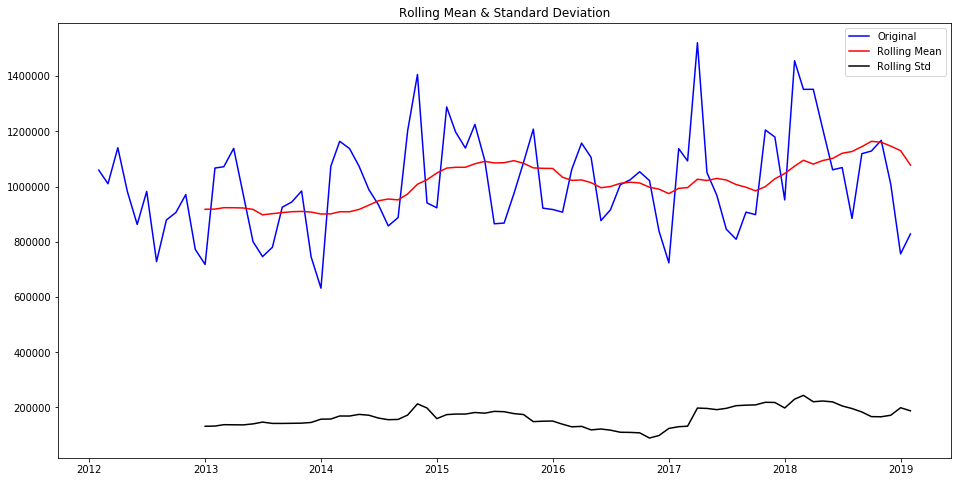

Results of Dickey-Fuller Test:
Test Statistic                 -1.974401
p-value                         0.297909
#Lags Used                     12.000000
Number of Observations Used    72.000000
Critical Value (1%)            -3.524624
Critical Value (5%)            -2.902607
Critical Value (10%)           -2.588679
dtype: float64


In [64]:
test_stationarity(df_monthly_code.revenue)

ensuring stationarity

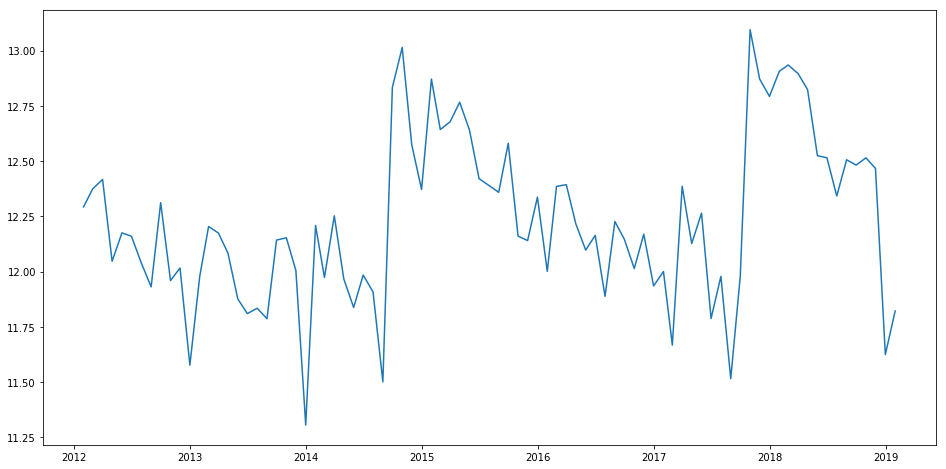

In [17]:
df_monthly_code_log = np.log(df_monthly_code.revenue)
plt.plot(df_monthly_code_log)

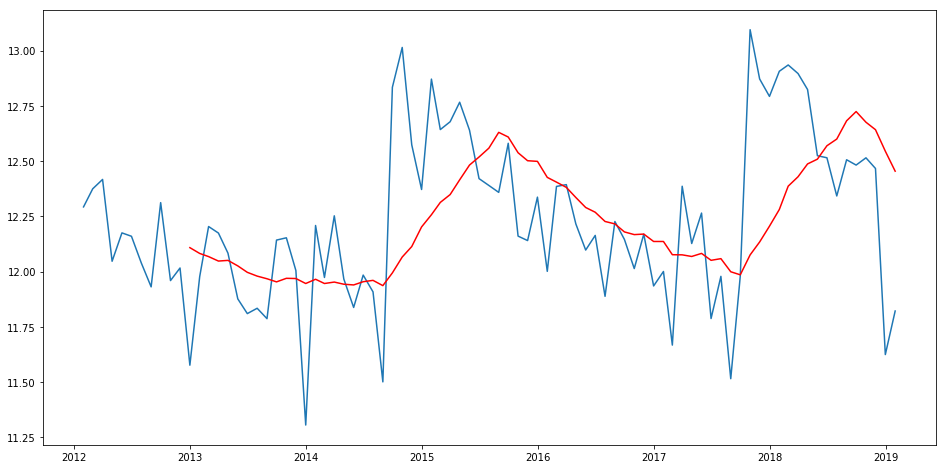

In [18]:
moving_avg = df_monthly_code_log.rolling(12).mean()
plt.plot(df_monthly_code_log)
plt.plot(moving_avg, color='red')

In [19]:
ts_log_moving_avg_diff = df_monthly_code_log - moving_avg
ts_log_moving_avg_diff.head(12)

date
2012-01-31         NaN
2012-02-29         NaN
2012-03-31         NaN
2012-04-30         NaN
2012-05-31         NaN
2012-06-30         NaN
2012-07-31         NaN
2012-08-31         NaN
2012-09-30         NaN
2012-10-31         NaN
2012-11-30         NaN
2012-12-31   -0.532176
Name: revenue, dtype: float64

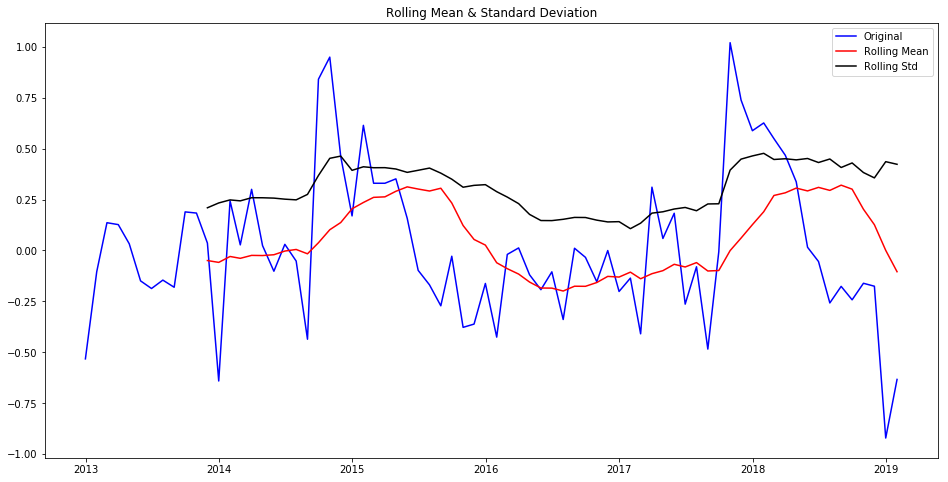

Results of Dickey-Fuller Test:
Test Statistic                 -4.482767
p-value                         0.000211
#Lags Used                      0.000000
Number of Observations Used    73.000000
Critical Value (1%)            -3.523284
Critical Value (5%)            -2.902031
Critical Value (10%)           -2.588371
dtype: float64


In [20]:
ts_log_moving_avg_diff.dropna(inplace=True)
test_stationarity(ts_log_moving_avg_diff)

alternative approach to trend and seasonality - Differencing

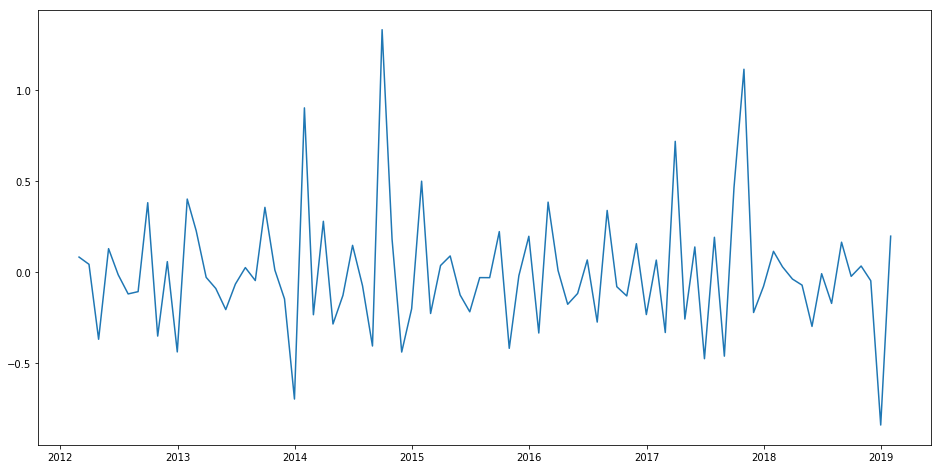

In [21]:
ts_log_diff = df_monthly_code_log - df_monthly_code_log.shift()
plt.plot(ts_log_diff)

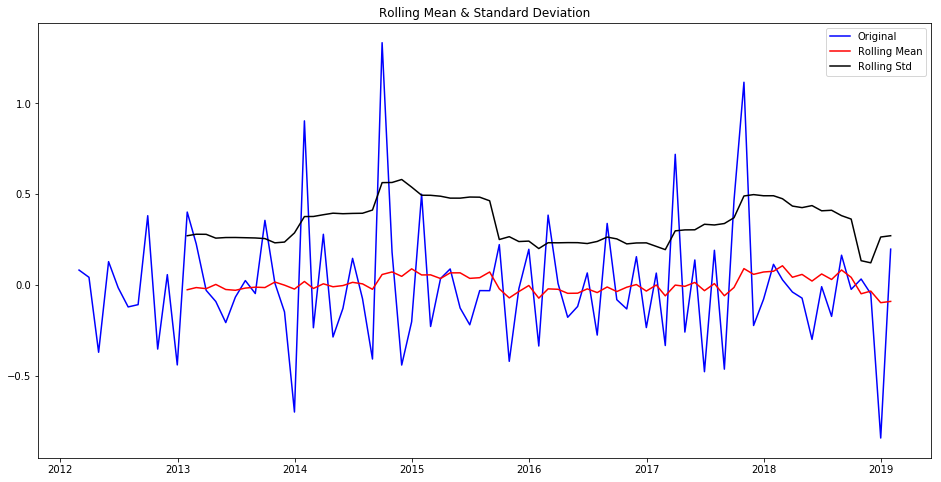

Results of Dickey-Fuller Test:
Test Statistic                -7.361395e+00
p-value                        9.479791e-11
#Lags Used                     2.000000e+00
Number of Observations Used    8.100000e+01
Critical Value (1%)           -3.513790e+00
Critical Value (5%)           -2.897943e+00
Critical Value (10%)          -2.586191e+00
dtype: float64


In [22]:
ts_log_diff.dropna(inplace=True)
test_stationarity(ts_log_diff)

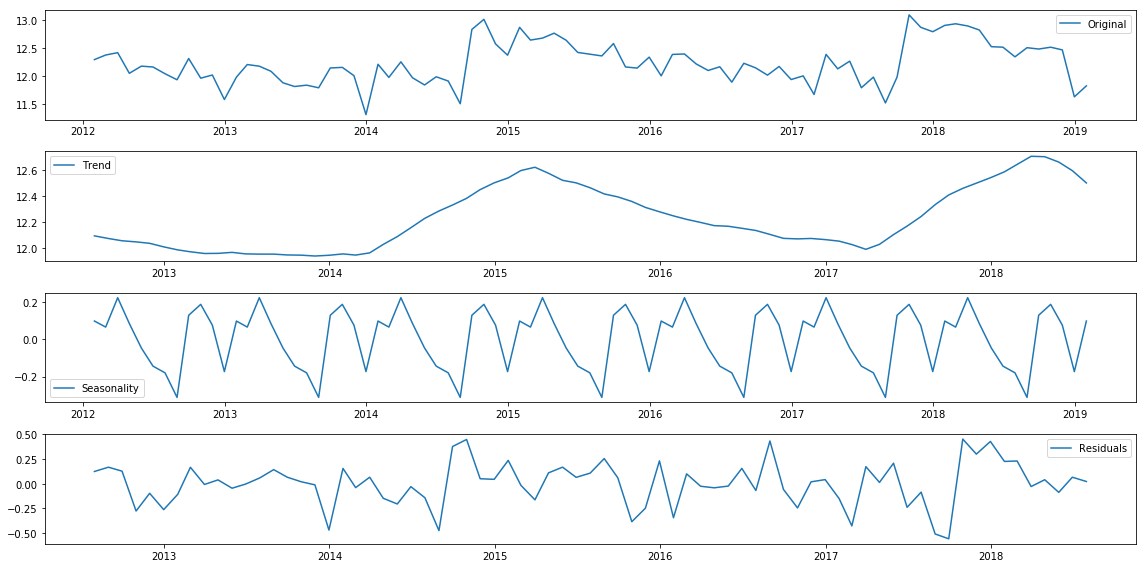

In [23]:
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(df_monthly_code_log)

trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

plt.subplot(411)
plt.plot(df_monthly_code_log, label='Original')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(trend, label='Trend')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(seasonal,label='Seasonality')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(residual, label='Residuals')
plt.legend(loc='best')
plt.tight_layout()

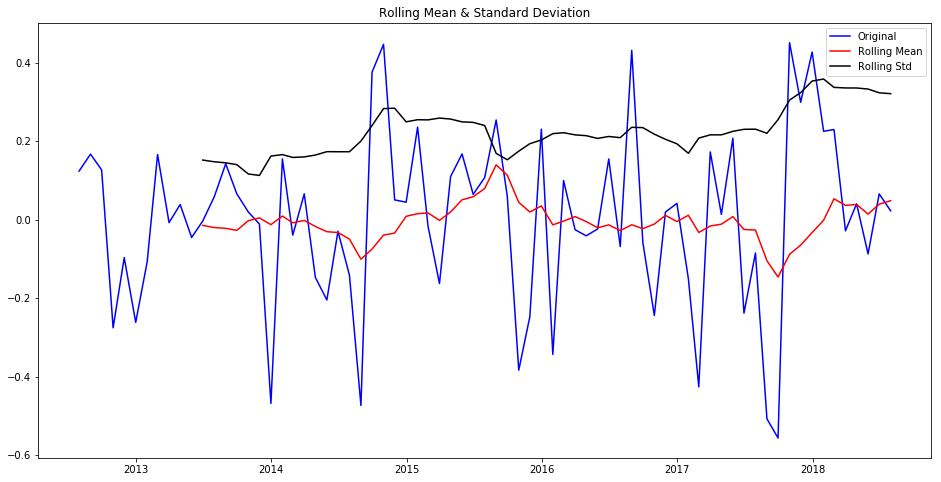

Results of Dickey-Fuller Test:
Test Statistic                -7.357461e+00
p-value                        9.695618e-11
#Lags Used                     0.000000e+00
Number of Observations Used    7.200000e+01
Critical Value (1%)           -3.524624e+00
Critical Value (5%)           -2.902607e+00
Critical Value (10%)          -2.588679e+00
dtype: float64


In [24]:
ts_log_decompose = residual
ts_log_decompose.dropna(inplace=True)
test_stationarity(ts_log_decompose)

In [25]:
#ACF and PACF plots:
from statsmodels.tsa.stattools import acf, pacf

In [26]:
lag_acf = acf(ts_log_diff, nlags=12)
lag_pacf = pacf(ts_log_diff, nlags=12, method='ols')

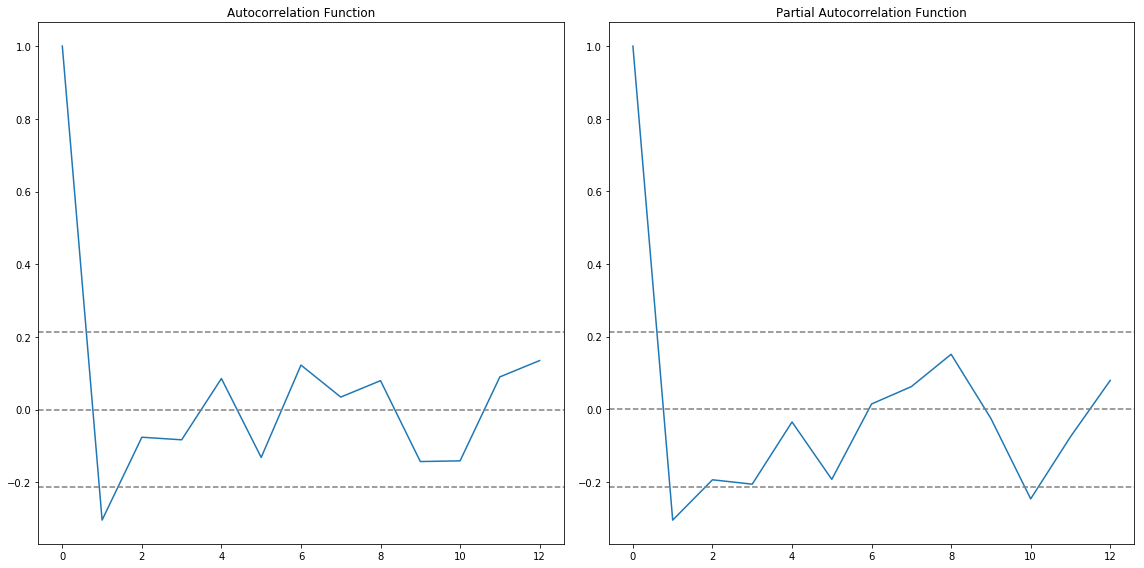

In [27]:
#Plot ACF: 
plt.subplot(121) 
plt.plot(lag_acf)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(ts_log_diff)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(ts_log_diff)),linestyle='--',color='gray')
plt.title('Autocorrelation Function')
#Plot PACF:
plt.subplot(122)
plt.plot(lag_pacf)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(ts_log_diff)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(ts_log_diff)),linestyle='--',color='gray')
plt.title('Partial Autocorrelation Function')
plt.tight_layout()

In [28]:
lag_acf

array([ 1.        , -0.30383637, -0.07587415, -0.08297674,  0.08556727,
       -0.13149935,  0.12258501,  0.03458547,  0.07974291, -0.14276571,
       -0.1409072 ,  0.09008048,  0.13504629])

In [29]:
from statsmodels.tsa.arima_model import ARIMA

c:\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  % freq, ValueWarning)
c:\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  % freq, ValueWarning)


Text(0.5, 1.0, 'RSS: 8.8290')

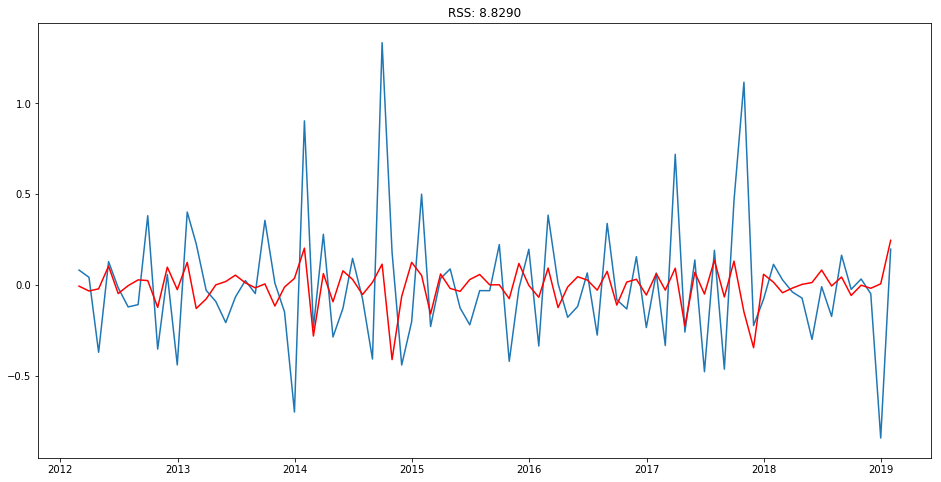

In [30]:
model = ARIMA(df_monthly_code_log, order=(1, 1, 0))  
results_AR = model.fit(disp=-1)  
plt.plot(ts_log_diff)
plt.plot(results_AR.fittedvalues, color='red')
plt.title('RSS: %.4f'% sum((results_AR.fittedvalues-ts_log_diff)**2))

c:\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  % freq, ValueWarning)
c:\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  % freq, ValueWarning)


Text(0.5, 1.0, 'RSS: 8.3443')

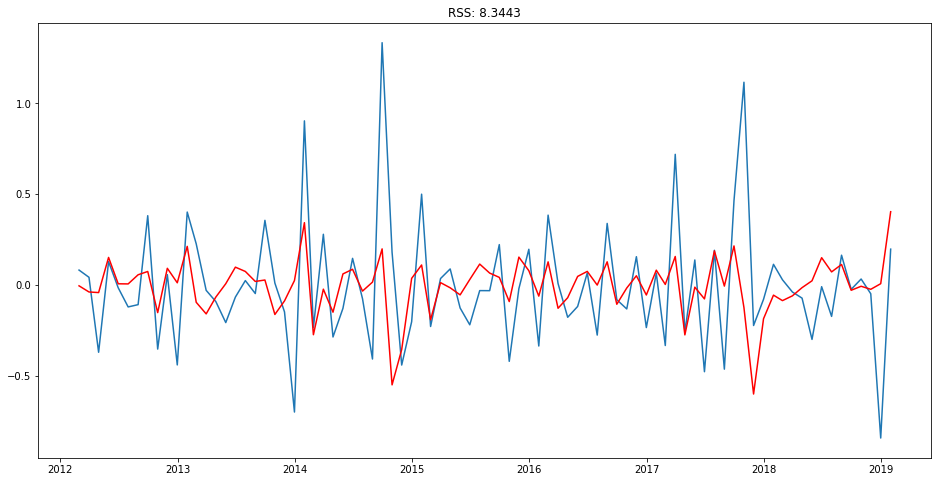

In [31]:
model = ARIMA(df_monthly_code_log, order=(0, 1, 1))  
results_MA = model.fit(disp=-1)  
plt.plot(ts_log_diff)
plt.plot(results_MA.fittedvalues, color='red')
plt.title('RSS: %.4f'% sum((results_MA.fittedvalues-ts_log_diff)**2))

c:\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  % freq, ValueWarning)
c:\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  % freq, ValueWarning)


Text(0.5, 1.0, 'RSS: 7.6275')

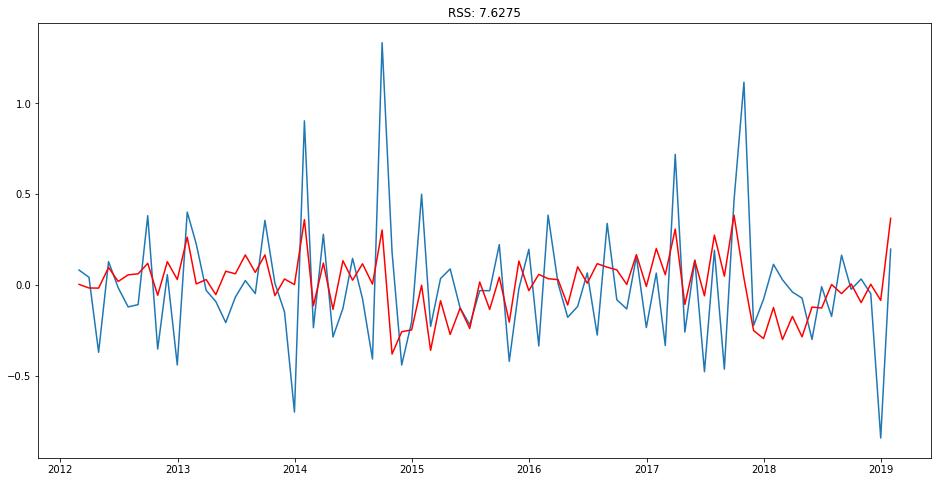

In [32]:
model = ARIMA(df_monthly_code_log, order=(2, 1, 2))  
results_ARIMA = model.fit(disp=-1)  
plt.plot(ts_log_diff)
plt.plot(results_ARIMA.fittedvalues, color='red')
plt.title('RSS: %.4f'% sum((results_ARIMA.fittedvalues-ts_log_diff)**2))

In [33]:
predictions_ARIMA_diff = pd.Series(results_ARIMA.fittedvalues, copy=True)
print(predictions_ARIMA_diff.head())

date
2012-02-29    0.003373
2012-03-31   -0.016539
2012-04-30   -0.017293
2012-05-31    0.096391
2012-06-30    0.019406
dtype: float64


In [34]:
predictions_ARIMA_diff_cumsum = predictions_ARIMA_diff.cumsum()
print(predictions_ARIMA_diff_cumsum.head())

date
2012-02-29    0.003373
2012-03-31   -0.013166
2012-04-30   -0.030459
2012-05-31    0.065932
2012-06-30    0.085337
dtype: float64


In [35]:
predictions_ARIMA_log = pd.Series(df_monthly_code_log.ix[0], index=df_monthly_code_log.index)
predictions_ARIMA_log = predictions_ARIMA_log.add(predictions_ARIMA_diff_cumsum,fill_value=0)
predictions_ARIMA_log.head()

c:\python37\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  """Entry point for launching an IPython kernel.


date
2012-01-31    12.292652
2012-02-29    12.296025
2012-03-31    12.279487
2012-04-30    12.262194
2012-05-31    12.358584
dtype: float64

Text(0.5, 1.0, 'RMSE: 418346.7142')

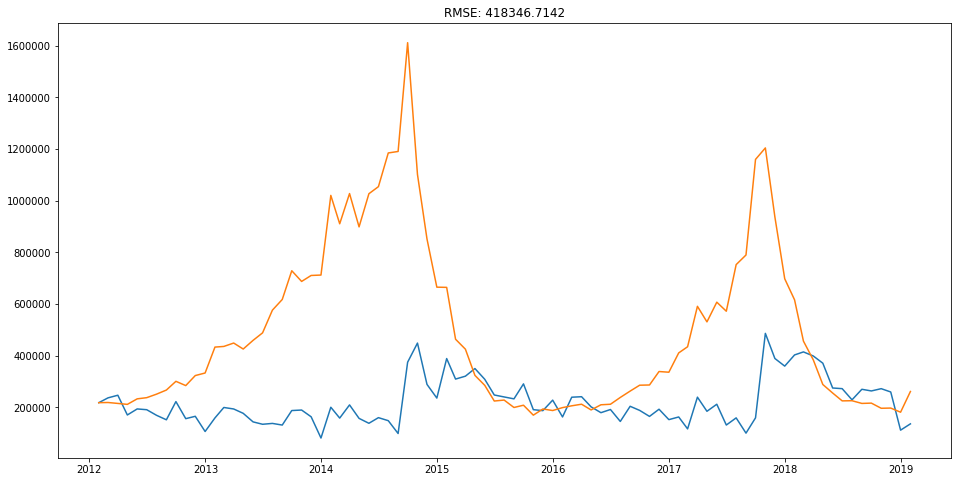

In [36]:
predictions_ARIMA = np.exp(predictions_ARIMA_log)
plt.plot(df_monthly_code.revenue)
plt.plot(predictions_ARIMA)
plt.title('RMSE: %.4f'% np.sqrt(sum((predictions_ARIMA-df_monthly_code.revenue)**2)/len(df_monthly_code.revenue)))